# GRIP: THE SPARKS FOUNDATION #GRIPMAY23
# Data Science and Business analytics Internship
# Task-1: Prediction using Supervised ML

# Author: Abhimanyu Khanna (May Batch)

# In this task, we have to predict the percentage of an student based on the no.of hours they have studied. This is a simple linear regression task as it involves just 2 variables.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.shape

(25, 2)

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


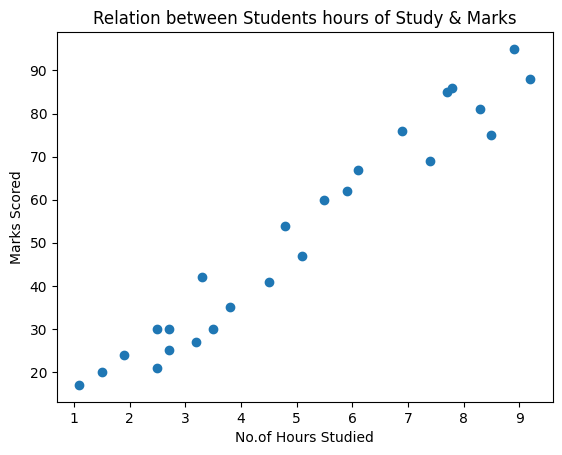

In [ ]:
plt.scatter(x=data.Hours ,y=data.Scores)
plt.title('Relation between Students hours of Study & Marks')
plt.xlabel('No.of Hours Studied')
plt.ylabel('Marks Scored')
plt.show()

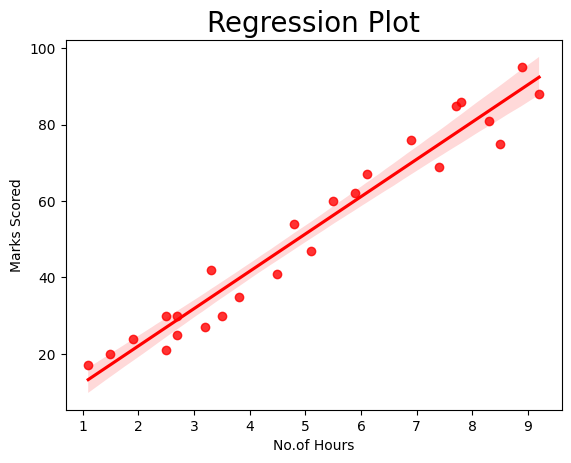

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
sns.regplot(x=data.Hours, y=data.Scores, color='r')
plt.title('Regression Plot',size=20)
plt.xlabel('No.of Hours',size=10)
plt.ylabel('Marks Scored',size=10)
plt.show()
print(data.corr())

Now, Here we can see that there is a Linear relationship between the Hours and Scores. And now, we are going to use Linear Regression model for the predictions

DATA PREPARATION

In [ ]:
# Here we are dividing our data into attributes and Labels
X = data.iloc[:, :-1].values
Y = data.iloc[:,1].values

In [ ]:
# Using Scikit-Learn's built-in train_test_split() method, splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state=1)

Training Algorithm


In [ ]:
from sklearn.linear_model import LinearRegression
Lr= LinearRegression()
Lr.fit(X_train, Y_train)

LinearRegression()

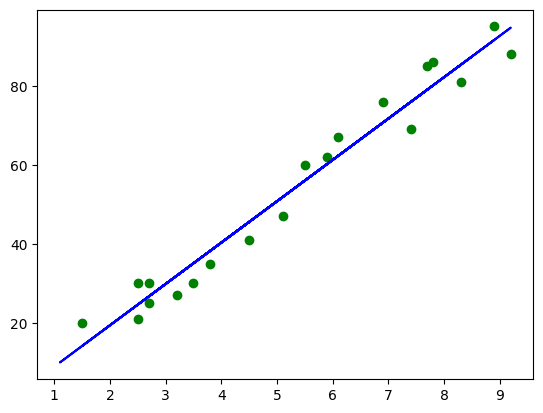

In [ ]:
# Plotting the line i.e y=mx + c
a= Lr.coef_
b= Lr.intercept_
line = a*X + b

# Plotting our Scatter Plot
plt.scatter(X_train,Y_train,c='g')
plt.plot(X, line, c='b')
plt.show()

Making Predictions

In [ ]:
y_pred= Lr.predict(X_test)
y_pred

array([ 9.97026179, 32.98470004, 18.33914843, 87.38246316, 48.67636248])

In [ ]:
prediction_df = pd.DataFrame({'Original value': Y_test, 'Predicted value': y_pred})
prediction_df

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


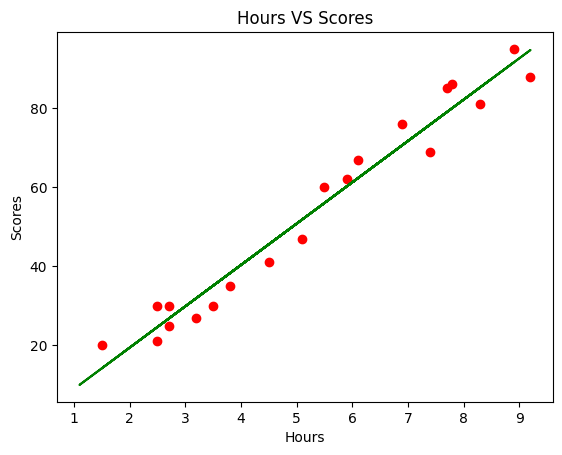

In [ ]:
plt.scatter(X_train, Y_train, c='r')
plt.plot(X,line, c='g')
plt.title("Hours VS Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [ ]:
#Testing the model
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = Lr.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 95.22829438402952


In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('R_2:', metrics.r2_score(Y_test, y_pred))

Mean Absolute Error: 7.882398086270432
Mean Squared Error: 68.88092074277635
Root Mean Squared Error: 8.299453038771674
R_2: 0.8421031525243527
